In [12]:
#Generates sample eigenvalue spectra of matrices M_q shown in Fig. 1. Used to produce Figures 2a, 2b, 2c.
#Run this cell followed by the next to generate the eigenvalue spectra 


import matplotlib.pyplot as plt
import numpy as np
import math
import multiprocessing
from multiprocessing import Pool
import csv
from numpy import linalg as la
from scipy.stats import kde
#from IPython import get_ipython  
#get_ipython().magic('reset -sf')
#plt.close('all')


numtrial = 1 #Number of realisations of the matrix to plot on the same set of axes

#model parameters
n = 750 #size of matrix
complexity = 0.375 #complexity = cn\sigma^2
c = 0.8 #connectivity
gammafracx = float(2.0/3.0)#proportion of prey species
gammafracy = float(1.0/3.0)#proportion of predator species
nx = int(gammafracx*float(n))
ny = int(gammafracy*float(n))
sigma = np.sqrt(complexity/(float(n)*c))#\sqrt{variance} of interaction coefficients
dx = 1.0 #intraspecies interaction (prey)
dy = 1.0 #intraspecies interaction (predator)

f = 3.0
ncmuxx = 2.0*f
muxx = float(ncmuxx)/float(n*c) #typical prey-prey interaction
ncmuxy = -2.0*f
muxy = float(ncmuxy)/float(n*c) #typical prey-predator interaction
ncmuyx = 2.0*f
muyx = float(ncmuyx)/float(n*c) #typical predator-prey interaction
ncmuyy = -1.0*f
muyy = float(ncmuyy)/float(n*c) #typical predator-predator interaction


#asymmetry parameters
gammax = 0.5
gammaxy = -0.9
gammay = -0.5

#dispersal rates and wavenumber
Dy = 5.0
Dx = 1.0
q = 0.0

meanxy = [muxy,muyx]
covxy = [[sigma**2.0, sigma**2.0*gammaxy], [sigma**2.0*gammaxy, sigma**2.0]]
meanxx = [muxx,muxx]
covxx = [[sigma**2.0, sigma**2.0*gammax], [sigma**2.0*gammax, sigma**2.0]]
meanyy = [muyy,muyy]
covyy = [[sigma**2.0, sigma**2.0*gammay], [sigma**2.0*gammay, sigma**2.0]]




if __name__ == '__main__':

	#construct matrix by drawing random numbers from multivariate Gaussians, then find eigenvalues
	myx = []
	for l in range(0,numtrial):
		J = np.zeros((nx + ny,nx + ny))
		Jxx = np.zeros((nx,nx))
		Jxy = np.zeros((nx,ny))
		Jyx = np.zeros((ny,nx))
		Jyy = np.zeros((ny,ny))

		for i in range(0,nx):
			for k in range(0,ny):
				Jxy[i][k], Jyx[k][i] = np.random.multivariate_normal(meanxy,covxy)
				J[i][nx + k] = Jxy[i][k]
				J[nx + k][i] = Jyx[k][i]
				myrand = np.random.uniform(0,1,1)
				if myrand < float(1.0-c):
				    J[i][nx + k] = 0
				    J[nx + k][i] = 0

		for i in range(0,nx):
			J[i][i] = -dx - Dx*q**2.0
			for k in range(0,i):
				Jxx[i][k], Jxx[k][i] = np.random.multivariate_normal(meanxx,covxx)
				J[i][k] = Jxx[i][k]
				J[k][i] = Jxx[k][i]
				myrand = np.random.uniform(0,1,1)
				if myrand < float(1.0-c):
				    J[i][k] = 0
				    J[ k][i] = 0
	
		for i in range(0,ny):
			J[nx + i][nx + i] = -dy - Dy*q**2.0
			for k in range(0,i):
				Jyy[i][k], Jyy[k][i] = np.random.multivariate_normal(meanyy,covyy)
				J[nx + i][nx +k] = Jyy[i][k]
				J[nx +k][nx +i] = Jyy[k][i]
				myrand = np.random.uniform(0,1,1)
				if myrand < float(1.0-c):
				    J[nx + i][nx + k] = 0
				    J[nx + k][nx + i] = 0

		
		evalues, evectors = la.eig(J)
		myx = np.append(myx, evalues)
		print(l)

	print("Eigenvalues ready")




0
Eigenvalues ready


Plotting eigenvalues of Jacobian...


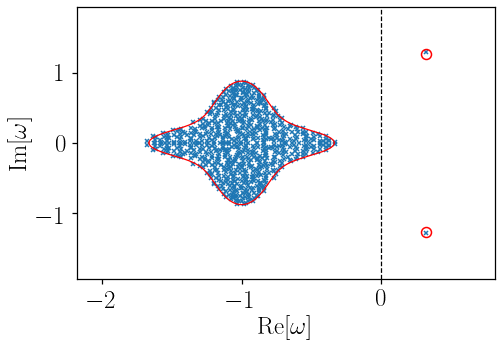

In [13]:
#importing data for theory lines -- produced in separate mathematica file
upper = np.genfromtxt('upper_example.csv', dtype = float, delimiter=',', skip_footer=0)
lower = np.genfromtxt('lower_example.csv', dtype = float, delimiter=',', skip_footer=0)
omx = np.genfromtxt('omx_example.csv', dtype = float, delimiter=',', skip_footer=0)
outlierx = np.genfromtxt('outlierx_example.csv', dtype = float, delimiter=',', skip_footer=0)
outliery = np.genfromtxt('outliery_example.csv', dtype = float, delimiter=',', skip_footer=0)

#Plotting the eigenvalues and the theory lines
SIZE = 25

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE-5)    # legend fontsize
plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.25
plt.rcParams['legend.loc'] = 'best'

edgewidth = 1.5
lwidth = 1.25
size = 7.5
tickwidth = 1.25
ticklength = 5
padness = 5
fsize = 5

	
xmin = min(np.real(myx)) - (max(np.real(myx))- min(np.real(myx)))/4.0
xmax = max(np.real(myx)) + (max(np.real(myx))- min(np.real(myx)))/4.0
ymin = min(np.imag(myx)) -(max(np.imag(myx))- min(np.imag(myx)))/4.0
ymax = max(np.imag(myx))+ (max(np.imag(myx))- min(np.imag(myx)))/4.0

print("Plotting eigenvalues of Jacobian...")
fig1 = plt.figure(figsize=(7.5,5))
ax1 = fig1.add_subplot(111)
ax1.plot(np.real(myx), np.imag(myx), 'x', markersize = (size -3.5), markeredgewidth = edgewidth)
ax1.plot(outlierx, outliery, 'o', markerfacecolor = 'none', markeredgecolor = 'r', markersize = size + 2.5, markeredgewidth = edgewidth)
ax1.plot(np.zeros(n), np.linspace(ymin,ymax,n, endpoint=True) , '--', linewidth = lwidth, color = "k")
ax1.plot(omx, upper, '-', linewidth = lwidth, color = "r")
ax1.plot(omx, lower, '-', linewidth = lwidth, color = "r")
#ax1.plot(omx2, upper2, '-', linewidth = lwidth, color = "r")
#ax1.plot(omx2, lower2, '-', linewidth = lwidth, color = "r")
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])
#axes.set_ylim([0,max(hist[0]/float(numtrial))])
ax1.set_xlabel(r"$\mathrm{Re}[\omega]$")
ax1.set_ylabel(r"$\mathrm{Im}[\omega]$")
#ax1.legend()
ax1.tick_params(width = tickwidth, length = ticklength)
ax1.tick_params(pad=padness)
#ax1.text(0.8, 0.15, r"(a)", transform=ax1.transAxes, fontsize=fsize,
       		#verticalalignment='top', bbox=props, color='black')
fig1.show()